## Iris FLower Classification
Aim: To develop a model that can classify iris
flowers into different species based on their sepal and petal
measurements.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files

# Upload the dataset file
uploaded = files.upload()

Saving IRIS.csv to IRIS.csv


### Performing EDA

In [16]:
df=pd.read_csv('IRIS.csv')

In [17]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### visualisation

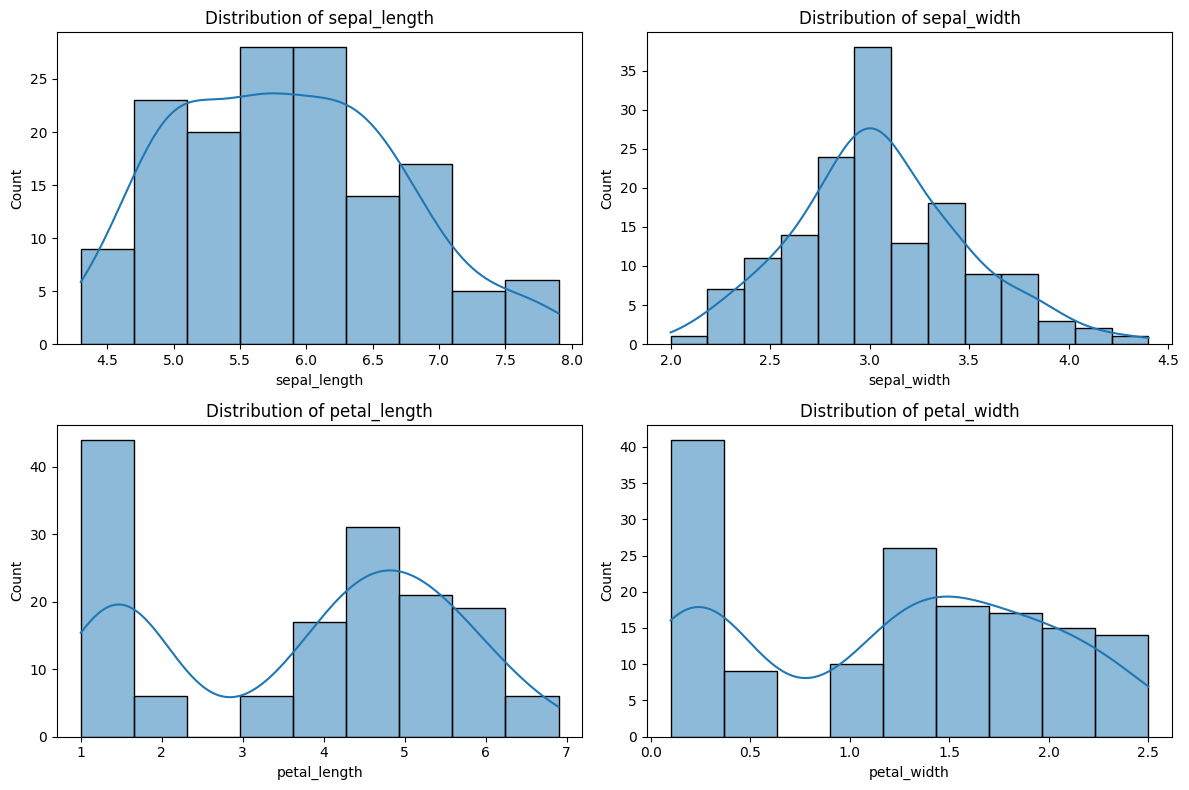

In [10]:
# Visualize the distribution of each feature
plt.figure(figsize=(12, 8))
for i, feature in enumerate(['sepal_length', 'sepal_width', 'petal_length', 'petal_width']):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

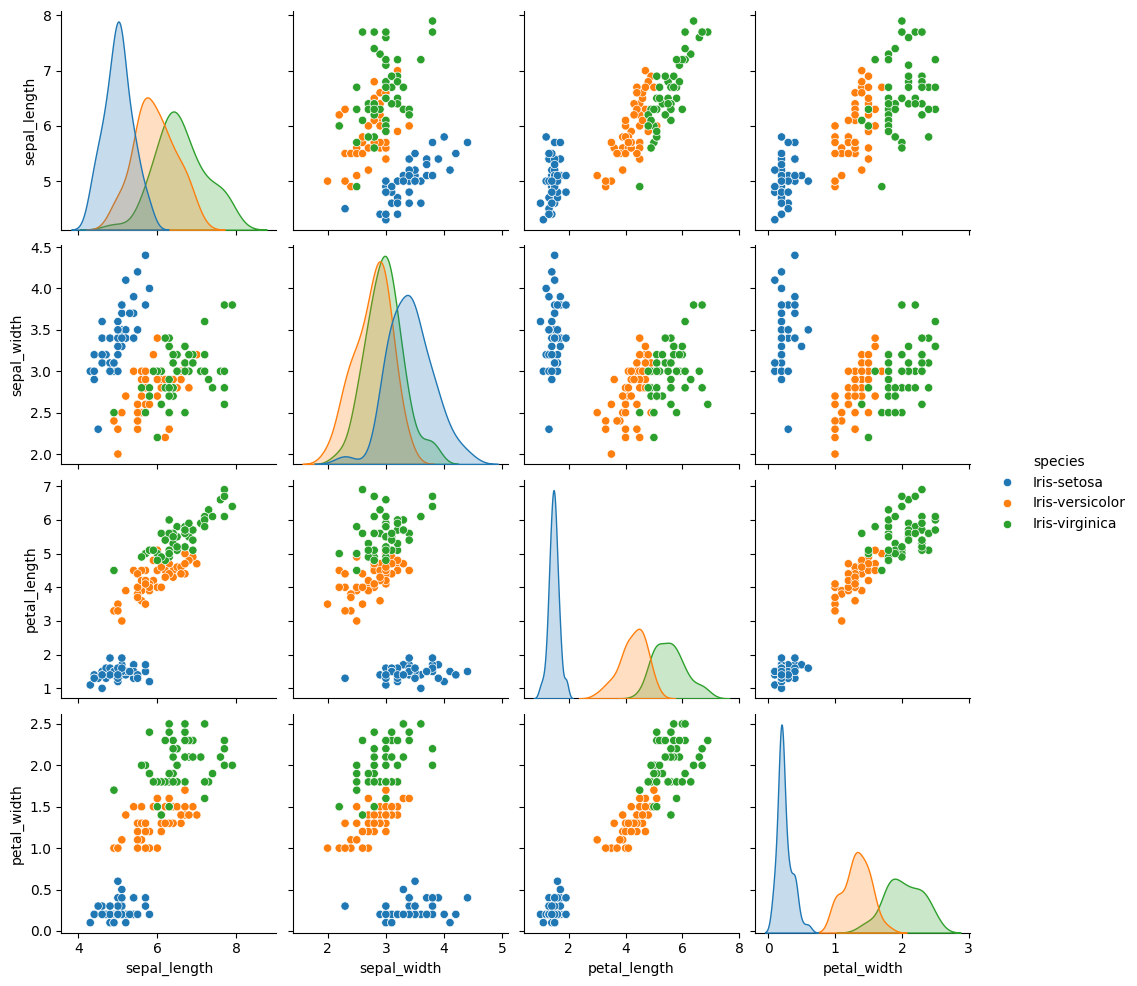

In [11]:
# Visualize pair plots to explore relationships between features
sns.pairplot(df, hue='species')
plt.show()

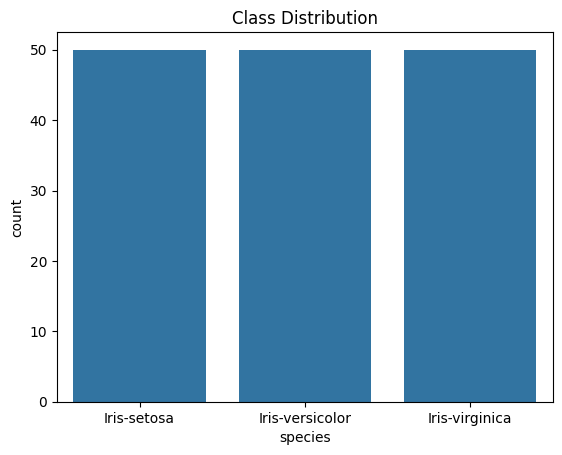

In [12]:
sns.countplot(x='species', data=df)
plt.title('Class Distribution')
plt.show()

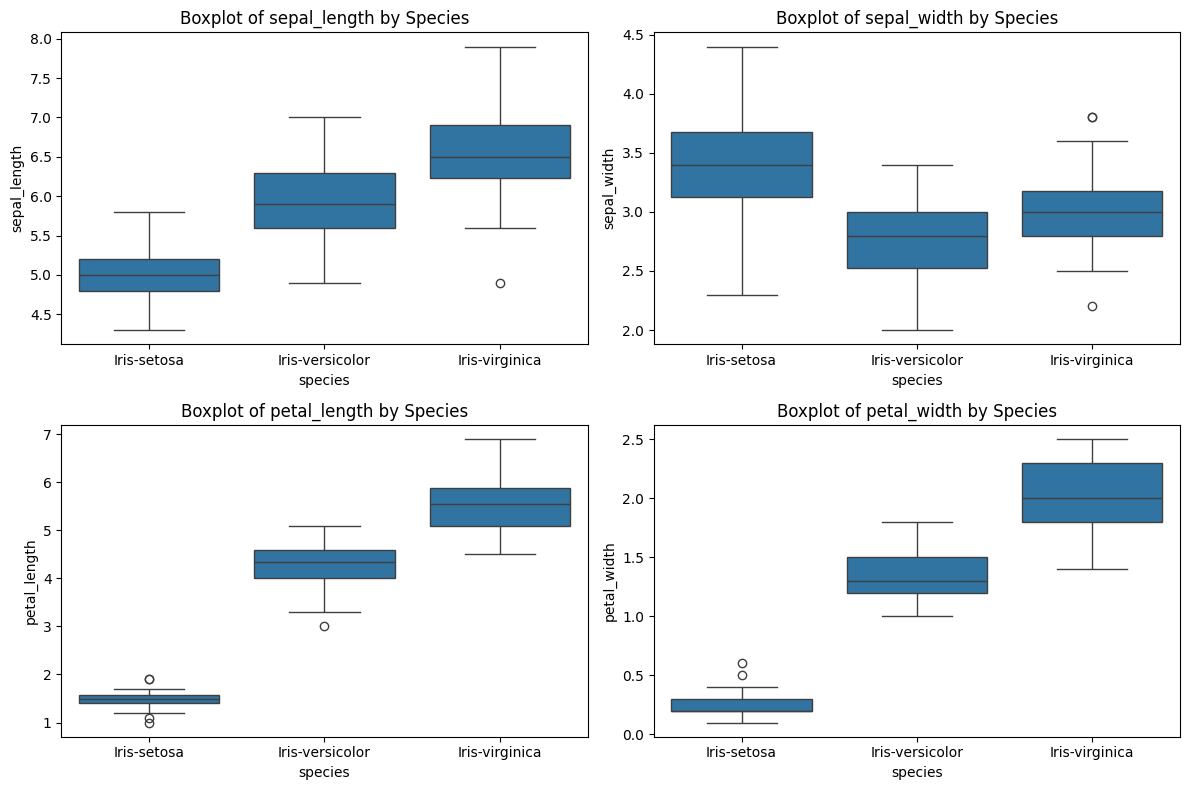

In [13]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(['sepal_length', 'sepal_width', 'petal_length', 'petal_width']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Species')

plt.tight_layout()
plt.show()

<ipython-input-14-991b0393750f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


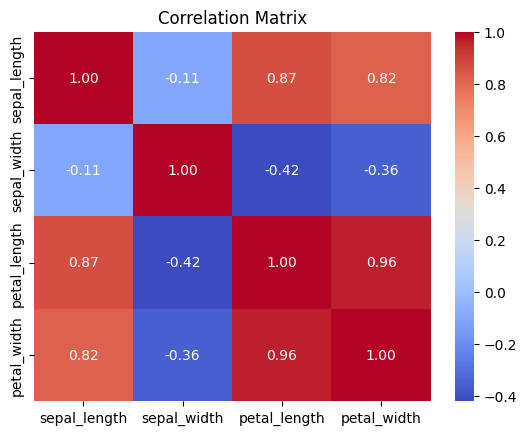

In [14]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

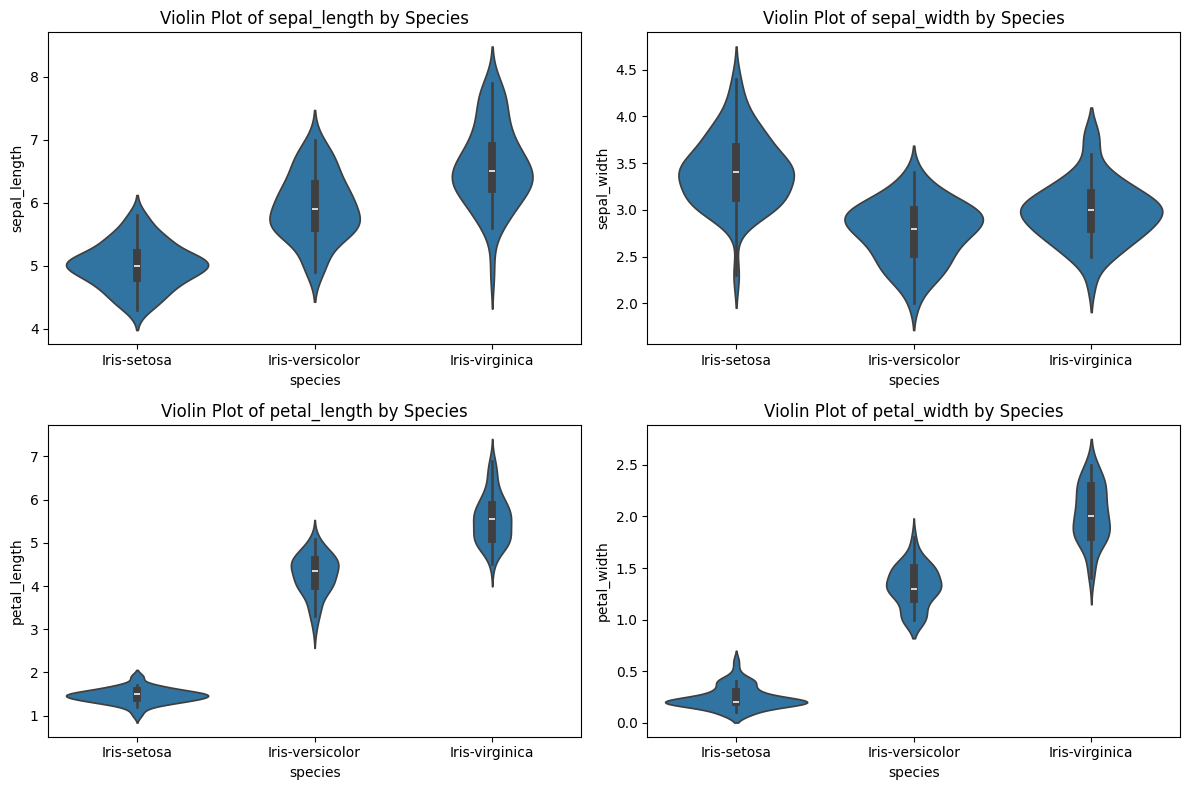

In [18]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(['sepal_length', 'sepal_width', 'petal_length', 'petal_width']):
    plt.subplot(2, 2, i+1)
    sns.violinplot(x='species', y=feature, data=df)
    plt.title(f'Violin Plot of {feature} by Species')

plt.tight_layout()
plt.show()

## Building a machine learning model to classify the data

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [20]:
# Split the dataset into features (X) and target (y)
X = df.drop('species', axis=1)
y = df['species']

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## using KNN(k nearest neighbour) model

In [23]:
# Train k-Nearest Neighbors (k-NN) model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
# Make predictions
knn_predictions = knn_model.predict(X_test_scaled)

In [25]:
# Check accuracy for k-NN
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f'k-NN Accuracy: {knn_accuracy:.4f}')


k-NN Accuracy: 1.0000


## using svc(support vector machine)

In [26]:
# Train Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)



SVC(kernel='linear')

In [27]:
# Make predictions
svm_predictions = svm_model.predict(X_test_scaled)

In [28]:
# Check accuracy for SVM
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f'SVM Accuracy: {svm_accuracy:.4f}')

SVM Accuracy: 0.9667


###  visualize the predicted classes for both k-NN and SVM on a scatter plot

In [29]:
# Create a DataFrame with the test set and actual species
df_test = pd.DataFrame(data=X_test_scaled, columns=df.columns[:-1])
df_test['actual_species'] = y_test

In [30]:
# Add predicted species for k-NN
df_test['knn_predicted'] = knn_predictions

# Add predicted species for SVM
df_test['svm_predicted'] = svm_predictions




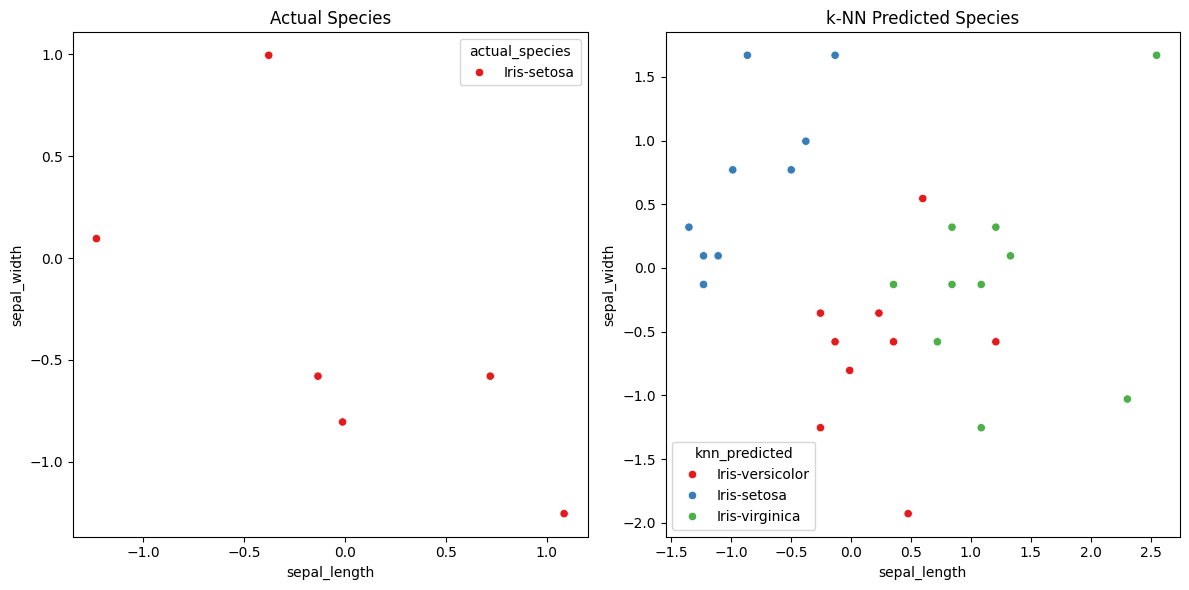

In [31]:
# Plot the actual and predicted classes for k-NN
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='sepal_length', y='sepal_width', hue='actual_species', data=df_test, palette='Set1', legend='full')
plt.title('Actual Species')

plt.subplot(1, 2, 2)
sns.scatterplot(x='sepal_length', y='sepal_width', hue='knn_predicted', data=df_test, palette='Set1', legend='full')
plt.title('k-NN Predicted Species')

plt.tight_layout()
plt.show()

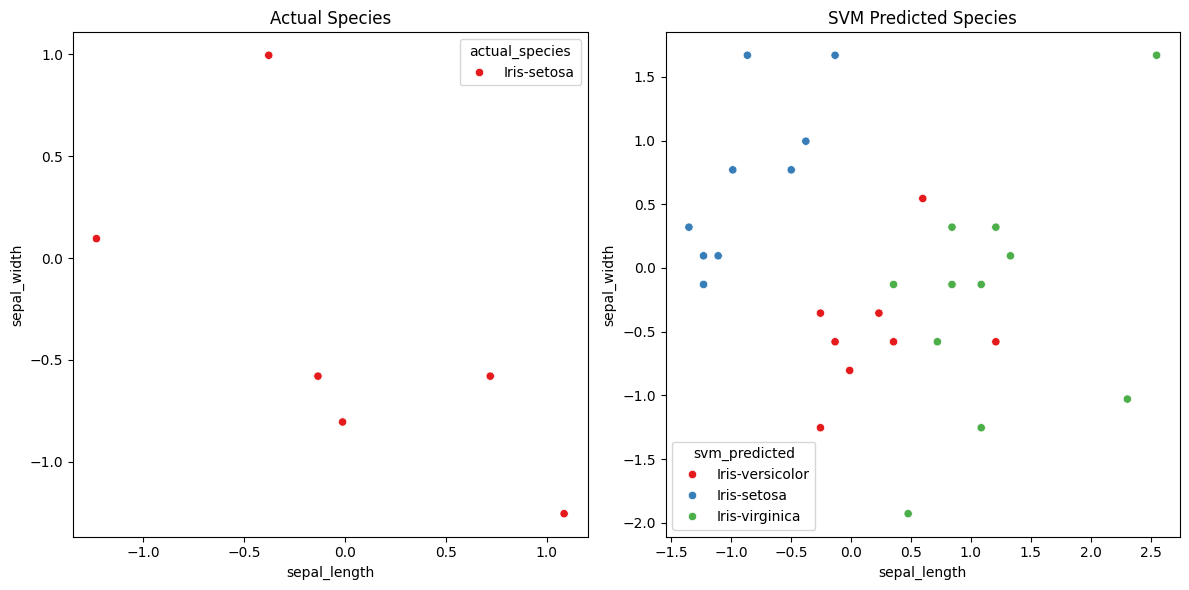

In [32]:
# Plot the actual and predicted classes for SVM
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='sepal_length', y='sepal_width', hue='actual_species', data=df_test, palette='Set1', legend='full')
plt.title('Actual Species')

plt.subplot(1, 2, 2)
sns.scatterplot(x='sepal_length', y='sepal_width', hue='svm_predicted', data=df_test, palette='Set1', legend='full')
plt.title('SVM Predicted Species')

plt.tight_layout()
plt.show()

In [33]:
from sklearn.metrics import classification_report



In [34]:
# Classification report for k-NN
print("Classification Report for k-NN:")
print(classification_report(y_test, knn_predictions))



Classification Report for k-NN:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [35]:
# Classification report for SVM
print("\nClassification Report for SVM:")
print(classification_report(y_test, svm_predictions))


Classification Report for SVM:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



### **Summary:**

After analyzing the classification reports for both k-Nearest Neighbors (k-NN) and Support Vector Machine (SVM) models on the Iris dataset, several key insights were uncovered.
###### **k-Nearest Neighbors (k-NN):**

*   Demonstrated perfect classification across all classes, resulting in an accuracy of 1.00.
*  Appeared to be well-suited for the Iris dataset,.

######**Support Vector Machine (SVM):**


*  Achieved high accuracy of 0.97, with a slight drop in recall for Iris-versicolor.
* Provided a strong performance and generalization, but may have some challenges distinguishing Iris-versicolor instances.

Both models showcased impressive classification capabilities on the Iris dataset. In conclusion, the k-NN model appears to be particularly well-suited for the task of classifying Iris flowers based on sepal and petal measurements, offering a straightforward and accurate solution.




